The optimal number of neighbors is 3
The optimal score is 0.94


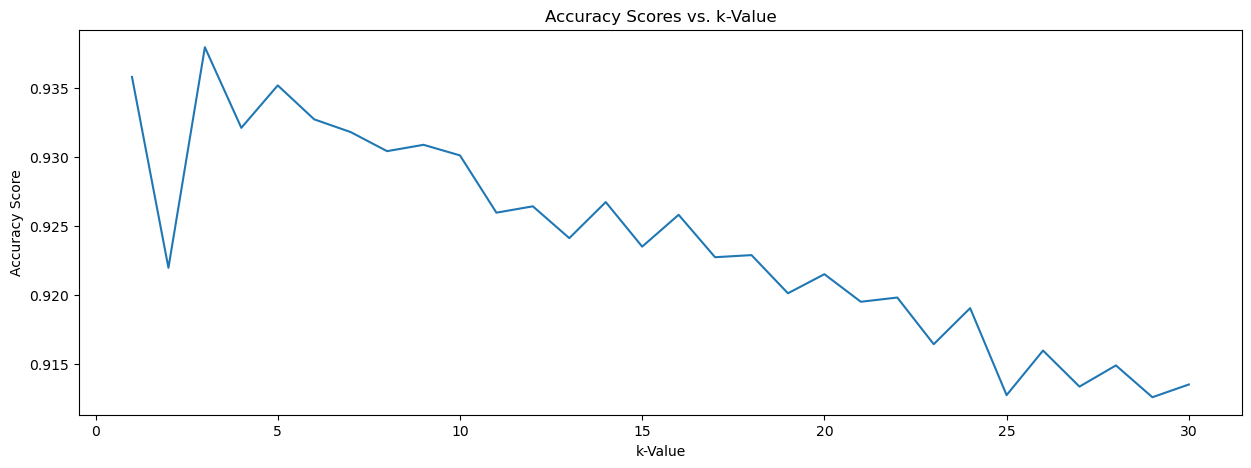

In [88]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# import dataset
dataset = pd.read_csv('~/Desktop/Capstone/adult.csv')

# create a copy of the dataframe
df = dataset.copy(deep=True)

# convert "?" to "NaN" for processing
for col in dataset.columns:
    df[[col]] = dataset[[col]].replace('?',np.NaN)
# select relevant columns (all except income) from the dataset
null_data = df.iloc[:,:-1]

# drop all rows with null values
df = df.dropna()

# create a dataframe with int64 data type
colname= []
for col in df.columns:
  if df[col].dtype == "int64":
      colname.append(col)

# create two copies (categorical features & target class) of the dataset to prepare the data for the algorithm
df_cf = df.copy()
df_tc = df.copy()

# create a dataframe for the categorical features 
df_cf.drop('income', axis='columns', inplace=True)
df_cf.drop(colname, axis='columns', inplace=True)

# create a dataframe for target class
df_tc.drop(df_copy.iloc[:,:-1], axis='columns', inplace=True)

# create a scaler object
std_scaler = StandardScaler()
# normalize numeric attributes and assign it into a new dataframe
df_norm = pd.DataFrame(std_scaler.fit_transform(df_copy[colname]), columns=colname)

# create a ordinal encoder
ord_encoder = OrdinalEncoder()
# transform categorical features into numerical features
for col in df_cf.columns[:]:
    if df_cf[col].dtype == "object":
        df_cf[col] = ord_encoder.fit_transform(df_cf[[col]])
# transform categorical label into binary label
df_tc["income"] = np.where(df_tc["income"].str.contains(">50K"), 0, 1)

# insert id column to different datasets
df_norm.insert(0, 'id', range(0, 0 + len(df_norm)))
df_cf.insert(0, 'id', range(0, 0 + len(df_cf)))
df_tc.insert(0, 'id', range(0, 0 + len(df_tc)))

# merge all datasets
df_feature = pd.merge(df_norm, df_cf, on=["id"])
df_final = pd.merge(df_feature, df_tc, on=["id"])
# drop the id column from the merged dataset
df_final.drop('id', axis='columns', inplace=True)

# create a variable to store accuracy scores in
scores = []
# provide a range of k-values for the prediction
k_range=list(range(1,31))
# calculate kNN accuracy scores for each k-value in defined range above
for k in k_range:
    # input the k-value as the parameter for kNN
    knn = KNeighborsClassifier(n_neighbors=k)
    # use training data to train algorithm
    knn.fit(x_train,y_train.ravel())
    # input test data into the algorithm
    y_pred = knn.predict(x_test)
    # append accuracy scores into the object
    scores.append(metrics.accuracy_score(y_test,y_pred))

# find the max accuracy score and the associated k-value
optimal_k = k_range[scores.index(max(scores))]

# print the results
print("The optimal number of neighbors is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))

# create the accuracy score vs. k-value plot and labeling title & axes
plt.figure(2,figsize=(15,5))
plt.plot(k_range, scores)
plt.xlabel('k-Value')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores vs. k-Value')

# print plot
plt.show()

Model accuracy score: 0.9380
Training set accuracy score: 0.9673
Training set score: 0.9673
Test set score: 0.9380

True Positives(TP) =  1332
True Negatives(TN) =  4776
False Positives(FP) =  268
False Negatives(FN) =  136 



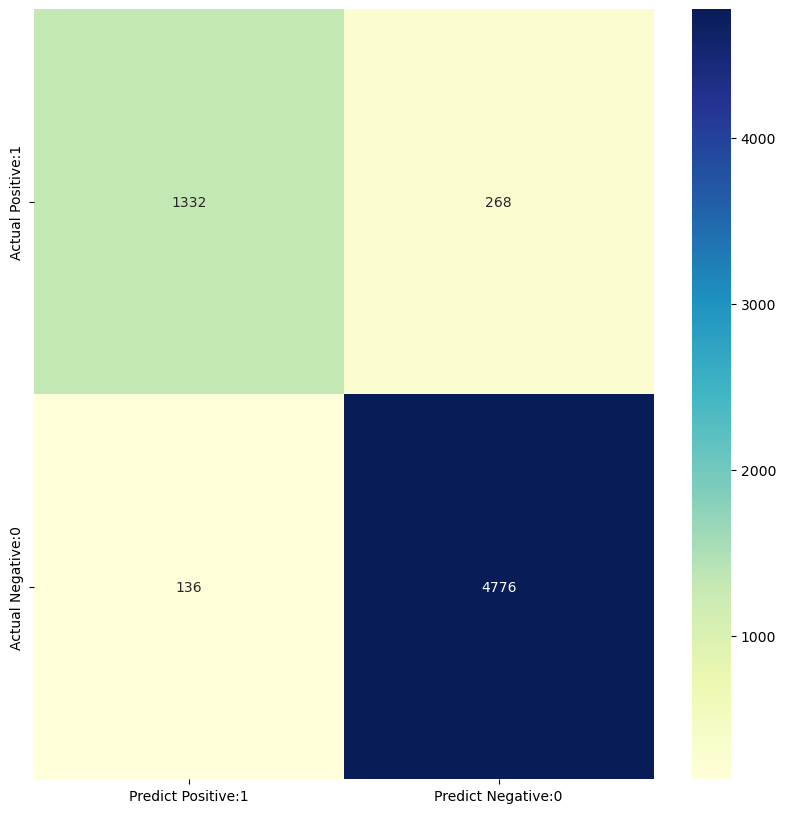

In [89]:
# import this library to calculate model scores
from sklearn.metrics import accuracy_score

# feed the optimal k-value calculated above into the kNN function
knn=KNeighborsClassifier(n_neighbors=optimal_k)
# input the training data into kNN
knn.fit(x_train,y_train.ravel())
# use kNN to make predictions for training and test data
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

# print model accuracy scores
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print('Training set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Training set score: {:.4f}'.format(knn.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(x_test, y_test)))

# produce the confusion matrix data from the model scores
cm = confusion_matrix(y_test, y_pred_test)

# implement the data into the matrix data frame
cm_matrix = pd.DataFrame(data=cm, columns=['Predict Positive:1', 'Predict Negative:0'], index=['Actual Positive:1', 'Actual Negative:0'])

# plot the data frame on a classic confusion matrix map
plt.figure(figsize=(10,10))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# print the results of the matrix elements
print('\nTrue Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0], '\n')

##REFERENCE: https://www.kaggle.com/code/ahmedabdo85/knn-classification-for-adult-income-dataset/notebook